In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.rand(500,6),0)

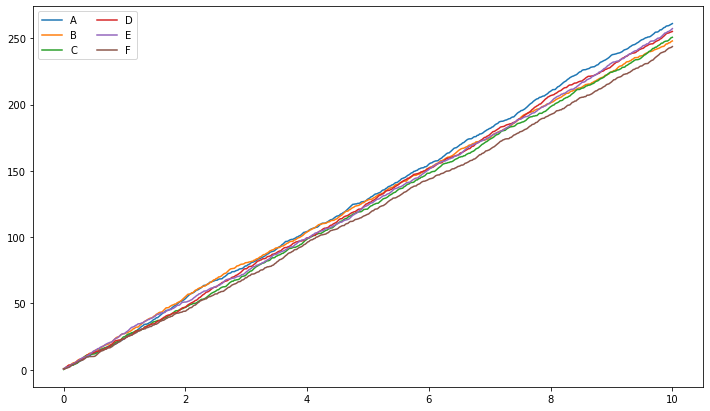

In [3]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [4]:
import requests
import pandas as pd

https://api.cryptowat.ch/markets/kraken/btcusd/price
https://api.cryptowat.ch/markets/bitstamp/btcusd/ohlc

In [5]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    resp = requests.get(url,params={'periods':'3600','after':str(int(pd.Timestamp(after).timestamp()))})
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=['CloseTime','OpenPrice','HighPrice','LowPrice','ClosePrice','Volume','NA'])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [6]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2020-12-26 19:43:35.010705')

In [7]:
btc = get_historic_price('btc','bitstamp', after=last_week)

In [8]:
eth = get_historic_price('eth','bitstamp', after=last_week)

In [9]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-12-26 20:00:00,25631.37,25934.00,25572.91,25917.36,226.434714,5.837342e+06
2020-12-26 21:00:00,25932.71,26450.00,25810.00,26409.20,721.534156,1.885487e+07
2020-12-26 22:00:00,26420.06,26809.50,26307.02,26646.65,870.958532,2.313151e+07
2020-12-26 23:00:00,26682.39,26765.19,26051.27,26394.00,631.610453,1.665157e+07
2020-12-27 00:00:00,26388.61,26641.58,26343.83,26466.28,333.631216,8.838627e+06


<AxesSubplot:xlabel='CloseTime'>

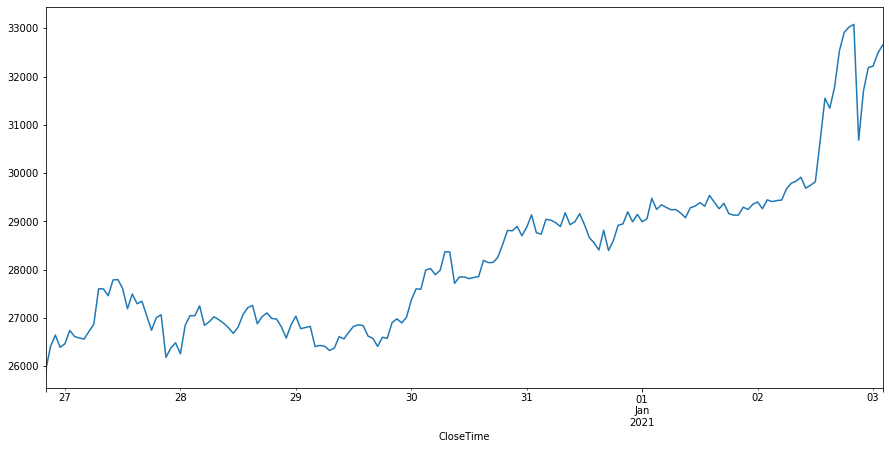

In [10]:
btc['ClosePrice'].plot(figsize=(15,7))

In [11]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-12-26 20:00:00,641.78,646.64,641.32,645.14,2242.319590,1.443692e+06
2020-12-26 21:00:00,645.10,650.82,641.69,648.95,2392.449479,1.547085e+06
2020-12-26 22:00:00,648.74,652.73,644.97,647.20,3995.917794,2.595943e+06
2020-12-26 23:00:00,647.16,647.49,628.56,633.86,4167.390683,2.650186e+06
2020-12-27 00:00:00,633.40,639.06,632.00,636.49,2971.225828,1.888231e+06


<AxesSubplot:xlabel='CloseTime'>

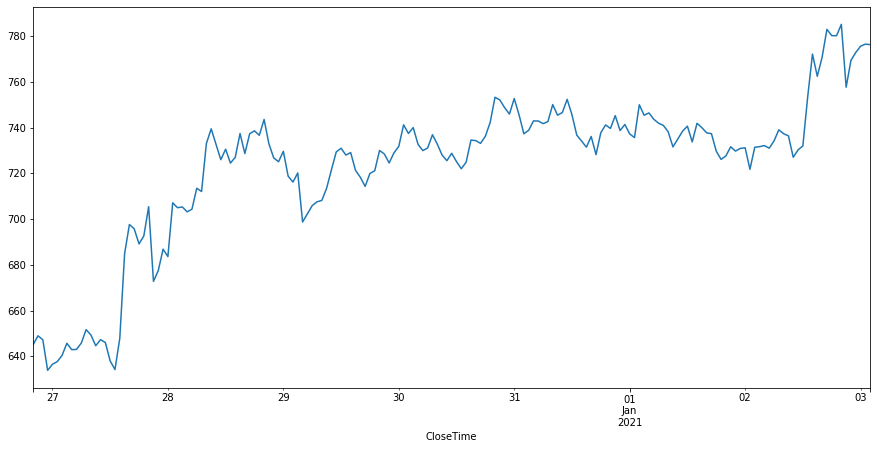

In [12]:
eth['ClosePrice'].plot(figsize=(15,7))

## Dynamic Graphics

Bokeh is for Dynamic and interactice graphics

In [13]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [14]:
output_notebook()

Loading BokehJS ...

In [15]:
p1 = figure(x_axis_type="datetime", title="Crypto Pcrices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color = '#f2a900', legend = 'Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color = '#A6CEE3', legend = 'Ether')

p1.legend.location = 'top_left'

show(p1)

## Exporting to Excel

In [16]:
from openpyxl.workbook import Workbook
writer = pd.ExcelWriter('Cryptos.xlsx')

In [17]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [18]:
 eth.to_excel(writer, sheet_name='Ether')

In [19]:
writer.save()